<a href="https://colab.research.google.com/github/KristinePenaroyo/Linear-Algebra_ChE_2nd-Sem-2021-2022/blob/main/Penaroyo_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra for ChE
## Laboratory 2 : Matrices

Now that we have a fundamental knowledge about Python, we'll try to look into greater dimensions.

### Objectives
At the end of this activity you will be able to:
1. Utilize the use of matrix operations.
2. Calculate the basic operations of matrices and their relation to linear equations using the Google Colab.
3. Run the program and transcribe the matrix equation and operations using Python.

# Discussion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

### Matrices

The notation and use of matrices is probably one of the fundamentals of modern computing. Matrices are also handy representations of complex equations or multiple inter-related equations from 2-dimensional equations to even hundreds and thousands of them.

Let's say for example you have $A$, $B$, and $C$ as system of equation.



$$
A = \left\{
    \begin{array}\
        t + u \\ 
        9t - 3u
    \end{array}
\right. \\
B = \left\{
    \begin{array}\
        t+u+v \\ 
        5t -7u -v \\
        -2t + 3u +6v
    \end{array}
\right. \\
C = \left\{
    \begin{array}\
        t-9u+2v-5w \\
        t-4u-6v+w \\
        3t-u+2v-5w \\
    \end{array}
\right. \\
$$

We can see that $A$  is a system of 2 equations with 2 parameters,  $B$  is a system of 3 equations with 3 parameters, and  $C$  is a system of 4 equations with 4 parameters. We can represent them as matrices as:

$$
A=\begin{bmatrix} 9 & 9 \\ 5 & {-10}\end{bmatrix} \\
B=\begin{bmatrix} 9 & 9 & 9 \\ 3 & -6 & -9 \\ -6 & 4 & 6\end{bmatrix}\\
C=\begin{bmatrix} 9 & -6 & 7 & -5 \\ 7 & -9 & -6 & 9 \\ 6 & -9 & 3 & -6\end{bmatrix}\\
$$

Let's assume that you already know the fundamental representation of matrices, their types, and operations. Now, let's proceed in doing it here in Python. 

### Declaring Matrices

Just like our previous laboratory activity, we'll represent system of linear equations as a matrix. The entities or numbers in matrices are called the elements of a matrix. These elements are arranged and ordered in rows and columns which form the list/array-like structure of matrices. And just like arrays, these elements are indexed according to their position with respect to their rows and columns. This can be reprsented just like the equation below. Whereas $A$ is a matrix consisting of elements denoted by $a_{i,j}$. Denoted by $i$ is the number of rows in the matrix while $j$ stands for the number of columns.<br>
Do note that the $size$ of a matrix is $i\times j$.

$$A=\begin{bmatrix}
a_{(0,0)}&a_{(0,1)}&\dots&a_{(0,j-1)}\\
a_{(1,0)}&a_{(1,1)}&\dots&a_{(1,j-1)}\\
\vdots&\vdots&\ddots&\vdots&\\
a_{(i-1,0)}&a_{(i-1,1)}&\dots&a_{(i-1,j-1)}
\end{bmatrix}
$$

We already gone over some of the types of matrices as vectors but we'll further discuss them in this laboratory activity. Since you already know how to describe vectors using <b>shape</b>, <b>dimensions</b> and <b>size</b> attributes, we'll use them to analyze these matrices.

In [ ]:
## Since we'll keep on describing matrices. Let's make a function.
def describe_mat(matrix):
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\n')

In [ ]:
## Declearing a 2 x 2 matrix 
K = np.array([
    [6,4],
    [2,8]          
])
describe_mat(K)

Matrix:
[[6 4]
 [2 8]]

Shape:	(2, 2)
Rank:	2



In [ ]:
R = np.array([
    [4,2,1],
    [1,3,7]
])
describe_mat(R)

Matrix:
[[4 2 1]
 [1 3 7]]

Shape:	(2, 3)
Rank:	2



In [ ]:
## Declearing a 3 x 2 matrix
I = np.array([
    [10, 2],
    [5, 7],
    [20, 19]
])
describe_mat(I)

Matrix:
[[10  2]
 [ 5  7]
 [20 19]]

Shape:	(3, 2)
Rank:	2



In [ ]:
S = np.array([13,8,3,4,87,5,2])
describe_mat(S)

Matrix:
[13  8  3  4 87  5  2]

Shape:	(7,)
Rank:	1



## Categorizing Matrices

There are many various ways to classify matrices. It could be according to their <b>shape</b>, and the other one is according to their <b>element values</b>. We'll try to explore them.

### According to shape

#### Row and Column Matrices

Row and column matrices are common in vector and matrix computations. They can also represent row and column spaces of a bigger vector space. Row and column matrices are represented by a single column or single row. So with that being, the shape of row matrices would be $1 \times j$ and column matrices would be $i \times 1$.

In [ ]:
## Declaring a Row Matrix

row_mat_1D = np.array([
    8, 7, 4, -6
]) ## this is a 1-D Matrix with a shape of (4,), it's not really considered as a row matrix.
row_mat_2D = np.array([
    [8,7,4,-6]
]) ## this is a 2-D Matrix with a shape of (8,4)
describe_mat(row_mat_1D)
describe_mat(row_mat_2D)

Matrix:
[ 8  7  4 -6]

Shape:	(4,)
Rank:	1

Matrix:
[[ 8  7  4 -6]]

Shape:	(1, 4)
Rank:	2



In [ ]:
## Declaring a Column Matrix

col_mat = np.array([
    [2],
    [3],
    [-78],
    [43],
    [7]
]) ## this is a 2-D Matrix with a shape of (5,1)
describe_mat(col_mat)

Matrix:
[[  2]
 [  3]
 [-78]
 [ 43]
 [  7]]

Shape:	(5, 1)
Rank:	2



#### Square Matrices

Square matrices are matrices that have an equal number of row and column sizes. We can say that a matrix is square if  $i = j$. We can tweak our matrix descriptor function to determine square matrices.

In [ ]:
def describe_mat(matrix):
    is_square = True if matrix.shape[0] == matrix.shape[1] else False 
    print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')

In [ ]:
square_mat = np.array([
    [8,7,-5],
    [2,13,9],
    [3,4,1],
    [6,-9,8]
])

non_square_mat = np.array([
    [8,12,6,-19],
    [2,-5,6,76]
])
describe_mat(square_mat)
describe_mat(non_square_mat)

Matrix:
[[ 8  7 -5]
 [ 2 13  9]
 [ 3  4  1]
 [ 6 -9  8]]

Shape:	(4, 3)
Rank:	2
Is Square: False

Matrix:
[[  8  12   6 -19]
 [  2  -5   6  76]]

Shape:	(2, 4)
Rank:	2
Is Square: False



### According to element values

#### Null Matrix

A Null Matrix is a matrix all of whose entities are zero. It is always a subspace of any vector or matrix.

In [ ]:
def describe_mat(matrix):
    if matrix.size > 0:
        is_square = True if matrix.shape[0] == matrix.shape[1] else False 
        print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nRank:\t{matrix.ndim}\nIs Square: {is_square}\n')
    else:
        print('Matrix is Null')

In [ ]:
null_mat = np.array([])
describe_mat(null_mat)

Matrix is Null


#### Zero Matrix

A zero matrix can be any rectangular matrix but with all elements having a value of 0.

In [ ]:
zero_mat_row = np.zeros((4,9))
zero_mat_sqr = np.zeros((9,9))
zero_mat_rct = np.zeros((6,9))

print(f'Zero Row Matrix: \n{zero_mat_row}')
print(f'Zero Square Matrix: \n{zero_mat_sqr}')
print(f'Zero Rectangular Matrix: \n{zero_mat_rct}')

Zero Row Matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Zero Square Matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Zero Rectangular Matrix: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Ones Matrix

A ones matrix, just like the zero matrix, can be any rectangular matrix but all of its elements are 1s instead of 0s.

In [ ]:
ones_mat_row = np.ones((6,4))
ones_mat_sqr = np.ones((4,4))
ones_mat_rct = np.ones((9,4))

print(f'Ones Row Matrix: \n{ones_mat_row}')
print(f'Ones Square Matrix: \n{ones_mat_sqr}')
print(f'Ones Rectangular Matrix: \n{ones_mat_rct}')

Ones Row Matrix: 
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Ones Square Matrix: 
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Ones Rectangular Matrix: 
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


#### Diagonal Matrix

A diagonal matrix is a square matrix where all the elements are zero except those on the diagonal of the matrix. 

In [ ]:
np.array([
    [8,0,0],
    [0,9,0],
    [0,0,10]
])
# a[1,1], a[2,2], a[3,3], ... a[n-1,n-1]

array([[ 8,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]])

In [ ]:
d = np.diag([24,38,47,88,95])
#d.shape[0] == d.shape[1]
d

array([[24,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0],
       [ 0,  0, 47,  0,  0],
       [ 0,  0,  0, 88,  0],
       [ 0,  0,  0,  0, 95]])

#### Identity Matrix

An identity matrix is a special kind of diagonal matrix in which the values at the diagonal are ones.

In [ ]:
np.eye(20)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [ ]:
np.identity(9)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#### Upper Triangular Matrix

An upper triangular matrix is a matrix that has no values below the diagonal.


In [ ]:
np.array([
    [8,-72,12],
    [6,9,20],
    [-5,4,2]
])

array([[  8, -72,  12],
       [  6,   9,  20],
       [ -5,   4,   2]])

In [ ]:
V = np.array([
              [9, -10, 5, 27, -2],
              [9, -10, 5, 27, -2],
              [9, -10, 5, 27, -2],
              [9, -10, 5, 27, -2],
              [9, -10, 5, 27, -2],
])
np.triu(V)


array([[  9, -10,   5,  27,  -2],
       [  0, -10,   5,  27,  -2],
       [  0,   0,   5,  27,  -2],
       [  0,   0,   0,  27,  -2],
       [  0,   0,   0,   0,  -2]])

#### Lower Triangular Matrix

A lower triangular matrix is a matrix that has no values above the diagonal.

In [ ]:
np.tril(V)


array([[  9,   0,   0,   0,   0],
       [  9, -10,   0,   0,   0],
       [  9, -10,   5,   0,   0],
       [  9, -10,   5,  27,   0],
       [  9, -10,   5,  27,  -2]])

In [ ]:
np.array([
          [3,0,0],
          [9,13,0],
          [1,17,23]
])

array([[ 3,  0,  0],
       [ 9, 13,  0],
       [ 1, 17, 23]])

##Practice

1. Given the linear combination below, try to create a corresponding matrix representing it.

:$$\theta = 5x + 3y - z$$


$$\theta =\begin{bmatrix} 5 & 3 & -1\end{bmatrix}\\ $$

2. Given the system of linear combinations below, try to encode it as a matrix. Also describe the matrix.


$$
A = \left\{\begin{array}
5x_1 + 2x_2 +x_3\\
4x_2 - x_3\\
10x_3
\end{array}\right.
$$


In [ ]:
A = np.array([
    [1, 2, 1],
    [0, 4, -1],
    [0, 0, 10]
])
A

array([[ 1,  2,  1],
       [ 0,  4, -1],
       [ 0,  0, 10]])

3. Given the matrix below, express it as a linear combination in a markdown.

In [ ]:
G = np.array([ 
    [1,7,8], 
    [2,2,2], 
    [4,6,7] 
])

$$
G=\begin{bmatrix} 1 & 7 & 8 \\ 2 & 2 & 2 \\ 4 & 6 & 7\end{bmatrix}\\
$$

4. Given the matrix below, display the output as a LaTeX markdown also express it as a system of linear combinations.


In [ ]:
H = np.tril(G)
H

array([[1, 0, 0],
       [2, 2, 0],
       [4, 6, 7]])

$$
H = \begin{bmatrix} 
1 & 0 & 0 \\
2 & 2 & 0\\
4 & 6 & 7 \\
\end{bmatrix}
$$

$$
H = \left\{\begin{array}
1x \\
2x + 2y\\
4x + 6y + 7z
\end{array}\right.
$$

##Matrix Algebra

###Addition

In [ ]:
A = np.array([
    [9,4],
    [7,10],
    [-2,6]
])
B = np.array([
    [5,17],
    [-4,5],
    [3,11]
])
A+B

array([[14, 21],
       [ 3, 15],
       [ 1, 17]])

In [ ]:
3+B ##Broadcasting
# 2*np.ones(A.shape)+A

array([[ 8, 20],
       [-1,  8],
       [ 6, 14]])

### Subtraction

In [ ]:
A-B

array([[  4, -13],
       [ 11,   5],
       [ -5,  -5]])

In [ ]:
5-B == 5*np.ones(B.shape)-B

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

###Element-wise Multiplication


In [ ]:
A*B

array([[ 45,  68],
       [-28,  50],
       [ -6,  66]])

In [ ]:
4*A

array([[36, 16],
       [28, 40],
       [-8, 24]])

In [ ]:
A @ B

ValueError: ignored

In [ ]:
alpha=5**-5
A/(alpha+B)

array([[ 1.79988481,  0.23528969],
       [-1.75014001,  1.99987201],
       [-0.66659556,  0.54543868]])

In [ ]:
np.add(A,B)

array([[14, 21],
       [ 3, 15],
       [ 1, 17]])

##**Activity**

### Task 1

Create a function named `mat_desc()` that througouhly describes a matrix, it should: <br>
1. Displays the shape, size, and rank of the matrix. <br>
2. Displays whether the matrix is square or non-square. <br>
3. Displays whether the matrix is an empty matrix. <br>
4. Displays if the matrix is an identity, ones, or zeros matrix <br>
   
Use 5 sample matrices in which their shapes are not lower than $(3,3)$.
In your methodology, create a flowchart discuss the functions and methods you have done. Present your results in the results section showing the description of each matrix you have declared.

In [ ]:
#Function Area
def mat_desc(matrix):
        print(f'Matrix:\n{matrix}\n\nShape:\t{matrix.shape}\nSize:\t{matrix.size}\nRank:\t{matrix.ndim}\n')
        square = False
        if (matrix.shape[0] == matrix.shape[1]):
          square = True
          print('The matrix is square')   
        else:
          print('The matrix is non-square') 
        if (matrix.shape[0] == 0 and matrix.shape[1] == 0):
          print('The matrix is empty')
        else: 
          print('The matrix is not empty')  
        identity = np.identity(matrix.shape[0])
        if (square and (identity == matrix).all()):
          print('Identity Matrix\n\n')
        else:
          print()
        one = np.ones((matrix.shape[0], matrix.shape[1]))
        if ((one == matrix).all()):
          print(end = 'Ones Matrix\n\n')
        else:
          print('')
        zero = np.zeros((matrix.shape[0], matrix.shape[1])) 
        if ((zero == matrix).all()):
          print('Zeros Matrix \n\n')
        else:
          print('')

In [ ]:
## Matrix declarations
A = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],     
])
B = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],    
])
C = np.zeros((4,6))
D = np.identity((6))
E = np.ones((4,5))

## Test Areas

In [ ]:
mat_desc(A)

Matrix:
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]

Shape:	(5, 5)
Size:	25
Rank:	2

The matrix is square
The matrix is not empty
Identity Matrix






In [ ]:
mat_desc(B)

Matrix:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Shape:	(3, 3)
Size:	9
Rank:	2

The matrix is square
The matrix is not empty

Ones Matrix




In [ ]:
mat_desc(C)

Matrix:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Shape:	(4, 6)
Size:	24
Rank:	2

The matrix is non-square
The matrix is not empty


Zeros Matrix 




In [ ]:
mat_desc(D)

Matrix:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

Shape:	(6, 6)
Size:	36
Rank:	2

The matrix is square
The matrix is not empty
Identity Matrix






### Flowchart
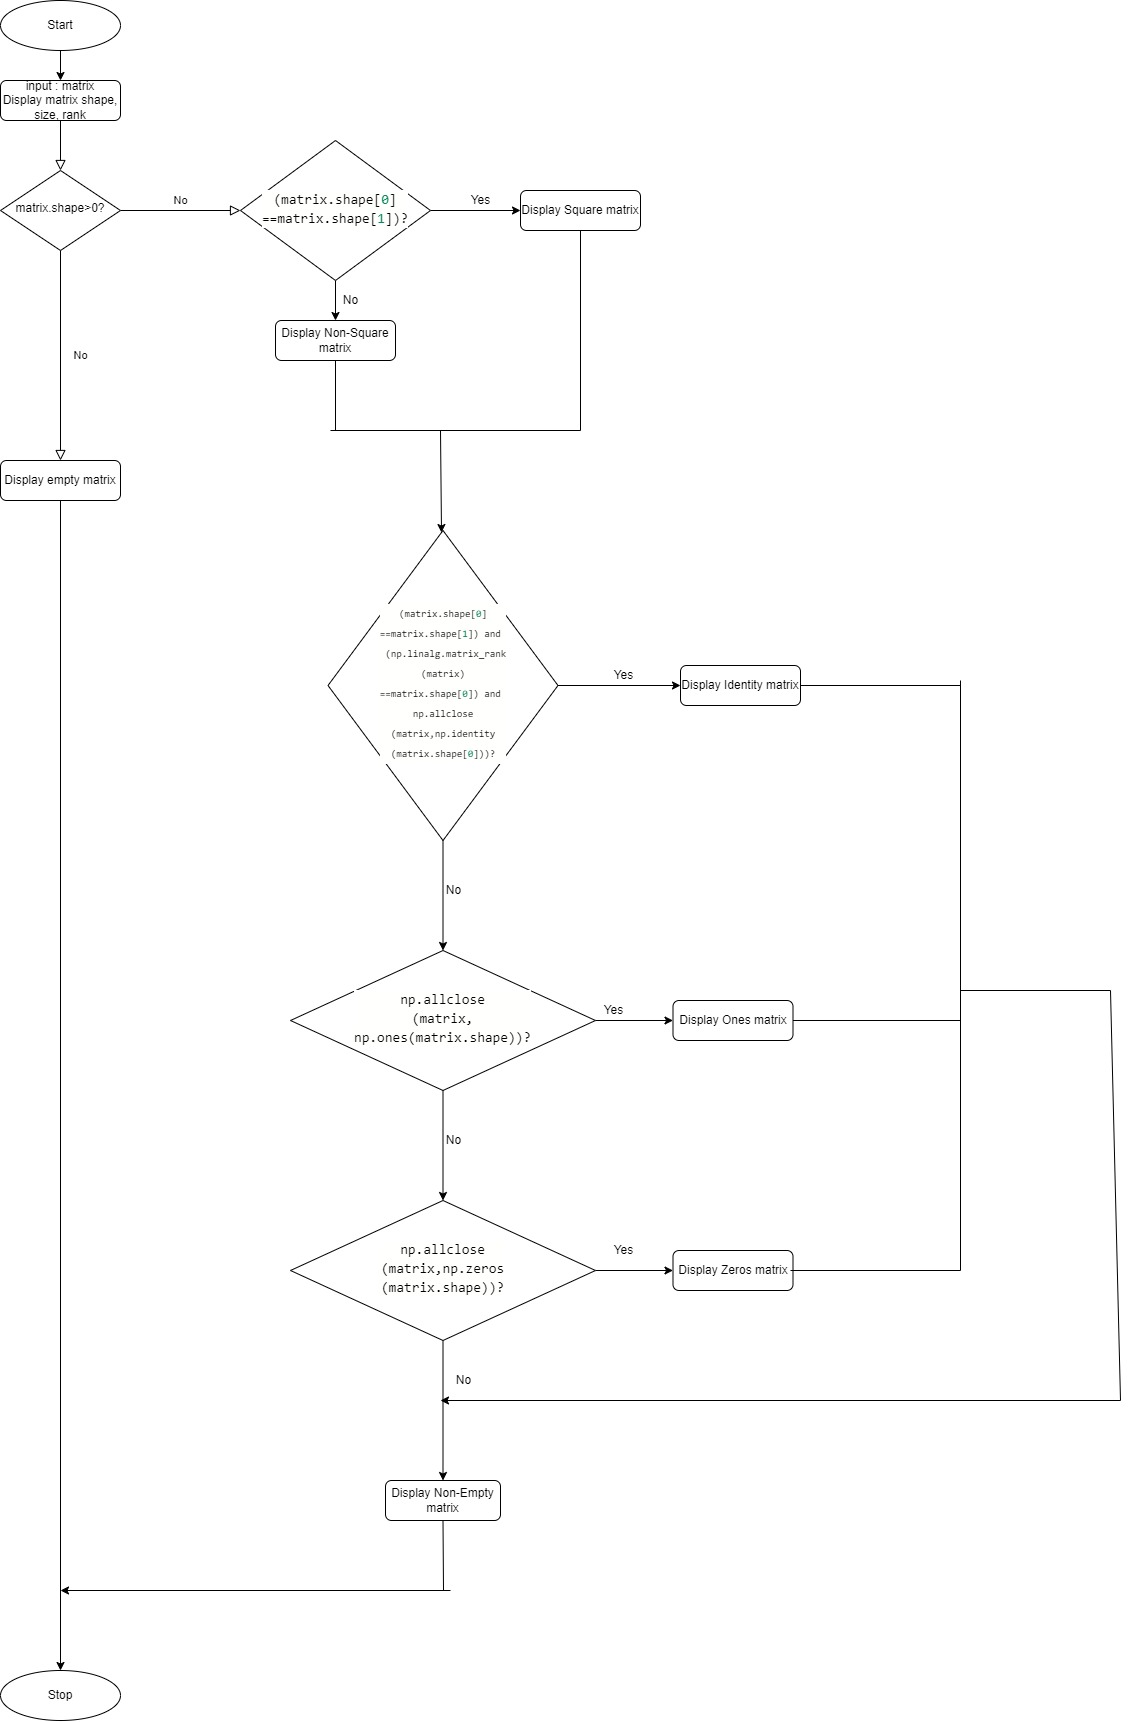

### Task 2

Create a function named `mat_operations()` that takes in two matrices a input parameters it should:<br>
 1. Determines if the matrices are viable for operation and returns your own error message if they are not viable.
 2. Returns the sum of the matrices.
 3. Returns the differen of the matrices.
 4. Returns the element-wise multiplication of the matrices.
 5. Returns the element-wise division of the matrices.

Use 5 sample matrices in which their shapes are not lower than $(3,3)$.
In your methodology, create a flowchart discuss the functions and methods you have done. Present your results in the results section showing the description of each matrix you have declared.

###Function area

In [ ]:
def mat_operations(K,J):
  if (K.shape != J.shape):
    print('The shape of both matrices are not the same. You will not able to perform operations')
  elif (K.shape == J.shape):
    print('The matrices are viable.')
  else:
    print('The matrix is empty')

###Matrix Declaration

In [ ]:
K = np.array([
    [2,8,7],
    [-2,4,6],
    [6,8,6]
])
J = np.array([
    [3,3,3],
    [2,4,2],
    [5,6,6]
])
L = np.array([
    [7,-3,13],
    [0,9,-2],
    [-5,1,8],
    [-10, 0, 1],
])
M = np.array([
    [2,-5,-11,0],
    [-9,4,6,13],
    [4,7,12,-2],
])
N = np.array([
    [1,4,5,12],
    [-5,8,9,0],
    [-6,7,11,19]
])

### Test Areas

In [ ]:
ksum = K + J
print('The sum of the given matrices: \n', ksum)
mat_operations(K,J)

The sum of the given matrices: 
 [[ 5 11 10]
 [ 0  8  8]
 [11 14 12]]
The matrices are viable.


In [ ]:
kdiff = K - J
print('The difference of the given matrices: \n', kdiff)
mat_operations(K,J)

The difference of the given matrices: 
 [[-1  5  4]
 [-4  0  4]
 [ 1  2  0]]
The matrices are viable.


In [ ]:
kmul = np.multiply(K,J)
print('The element-wise multiplication of the given matrices: \n', kmul)
mat_operations(K,J)

The element-wise multiplication of the given matrices: 
 [[ 6 24 21]
 [-4 16 12]
 [30 48 36]]
The matrices are viable.


In [ ]:
kdiv = np.divide(K,J)
print('The element-wise division of the given matrices: \n', kdiv)
mat_operations(K,J)

The element-wise division of the given matrices: 
 [[ 0.66666667  2.66666667  2.33333333]
 [-1.          1.          3.        ]
 [ 1.2         1.33333333  1.        ]]
The matrices are viable.


### Flowchart
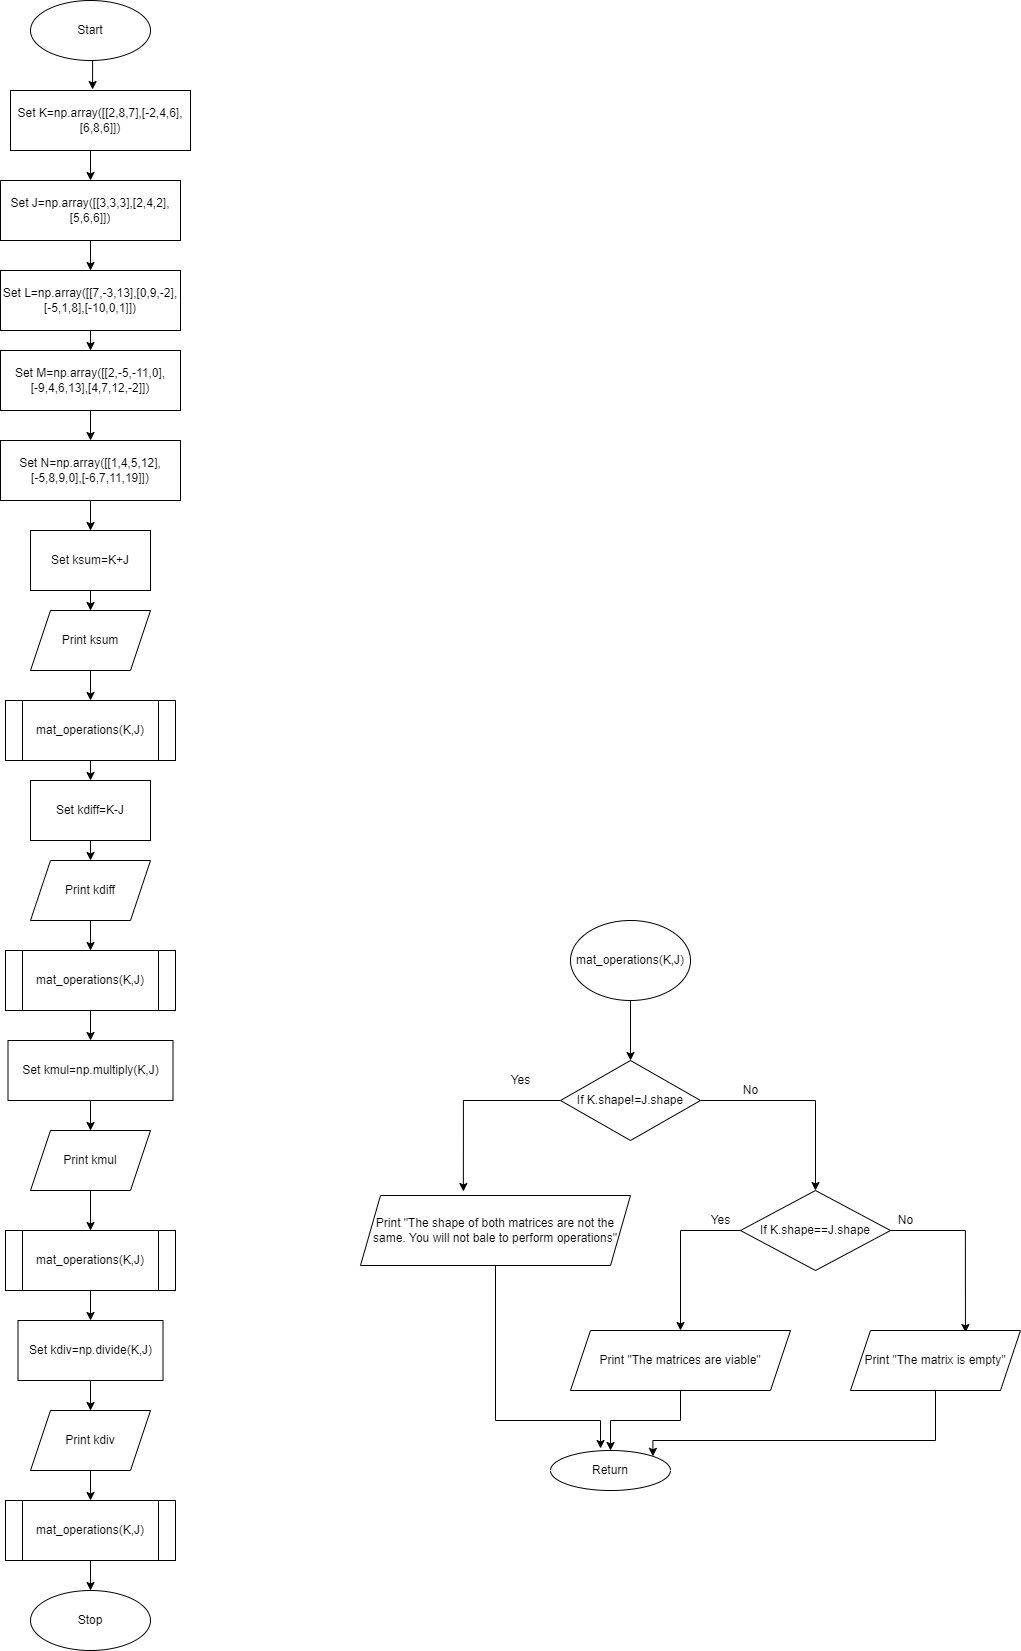

## Conclusion


For your conclusion synthesize the concept and application of the laboratory. Briefly discuss what you have learned and achieved in this activity. Also answer the question: "How can matrix operations solve problems in technology?".

Matrices have a wide range of applications in various branches of mathematics; in fields like engineering, physics, economics, and statistics. It may be used to write and deal with many linear equations, often known as a system of linear equations, in a compact manner. The numbers in a matrix can represent both data and mathematical equations. 

Considering that we live in the era of advanced technologies, and we use modern inventions in our everyday life to analyze things to solve a problem, we need tools like matrices that we can utilize, such as in linear programming, where we can use to predict. Matrices can be used to analyze things to solve problems and can be applied to develop different technologies. In this activity, students learned how to apply operations on matrices. They also discussed how to determine the shapes of it and how important to know first the shape of the matrix to determine if an operation can be applied to it. Also, they comprehend different matrices and their functions using Python programming. Furthermore, the students were able to apply the learnings in creating two programs; where they declare matrices, display shape, rank, and size, and lastly, they use different mathematical operations in the declared matrices. With that, we can say that matrix operations are a much more efficient solution in technology. 



 



